## 03. One-Way ANOVA

In [2]:
/* Import dataset */
proc import 
    datafile='/home/u43674369/projects/project01/placement_data.csv' 
    out=df dbms=csv replace;
run;

/* Replace missing values with 0 */
proc stdize data=df
    out=df
    reponly missing=0;
run;

Error trying to read authinfo file:C:\Users\james\_authinfo
[Errno 2] No such file or directory: 'C:\\Users\\james\\_authinfo'
Did not find key oda in authinfo file:C:\Users\james\_authinfo

Please enter the IOM user id: james.ssjeong@gmail.com
Please enter the password for IOM user : ········
SAS Connection established. Subprocess id is 9732

7                                                          The SAS System                      Sunday, November  1, 2020 04:36:00 PM

34         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
34       ! ods graphics on / outputfmt=png;
35         
36         /* Import dataset */
37         proc import
38             datafile='/home/u43674369/projects/project01/placement_data.csv'
39             out=df dbms=csv replace;
40         run;
NOTE: Unable to open parameter catalog: SASUSER.PARMS.PARMS.SLIST in update mode. Temporary parameter values will be saved to 
WORK.PARMS.PARM


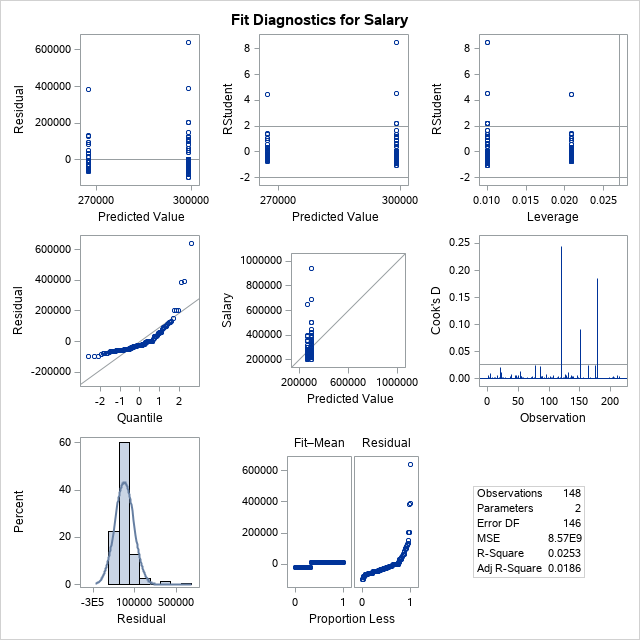
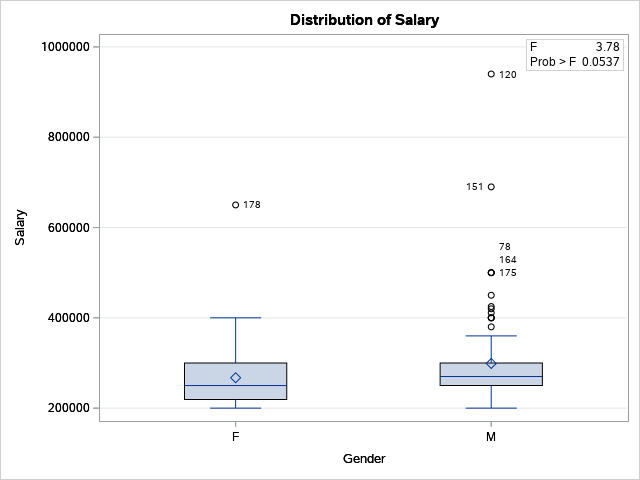
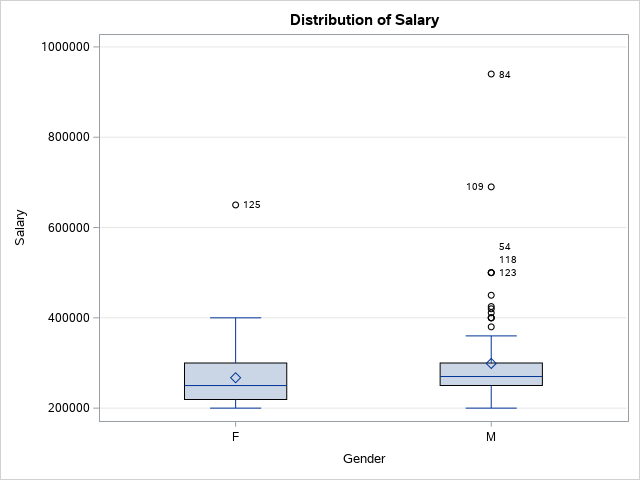
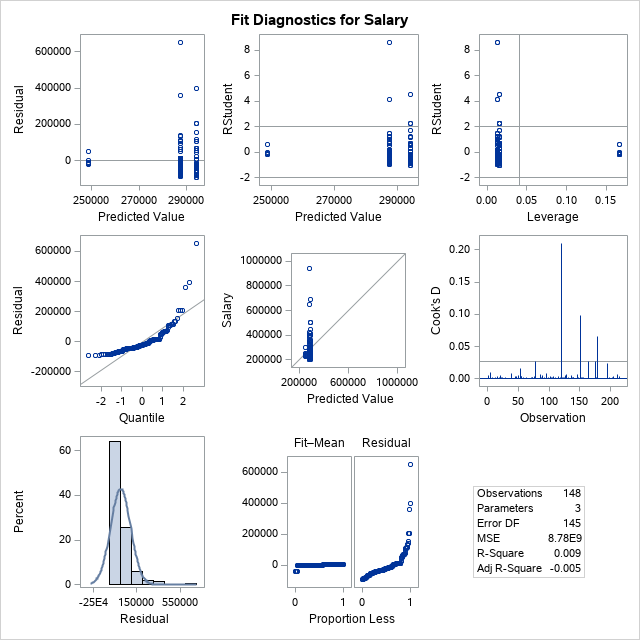
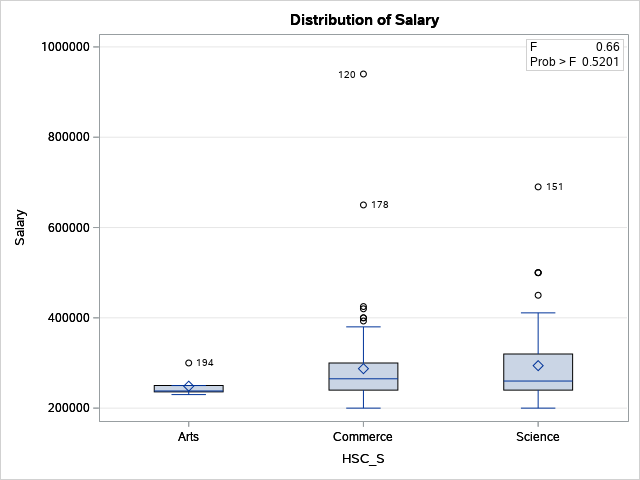
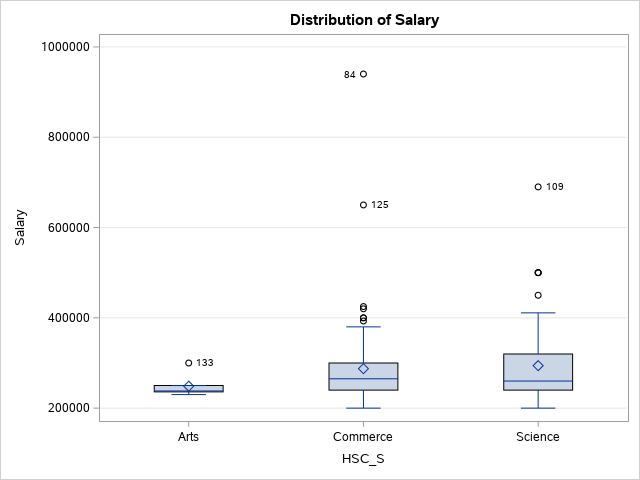
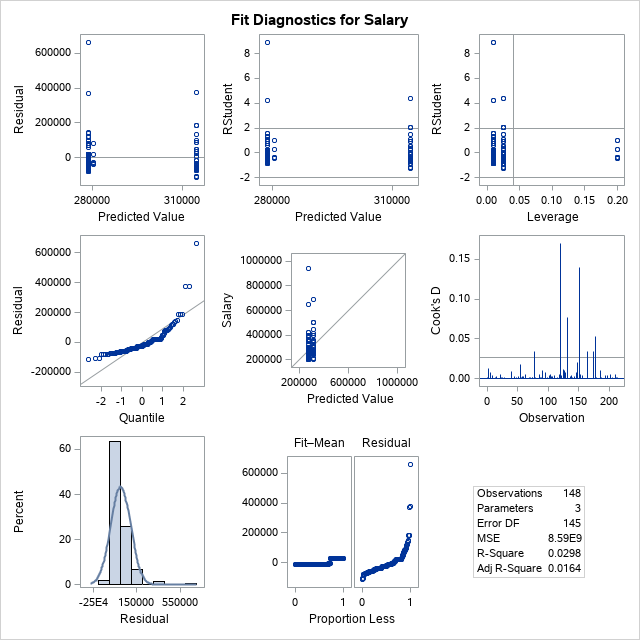
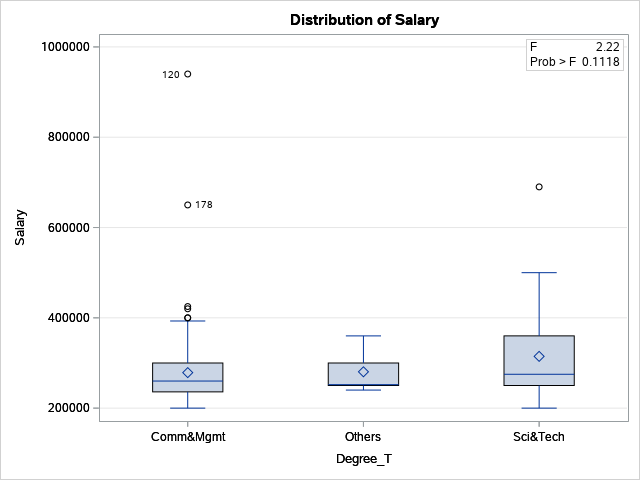
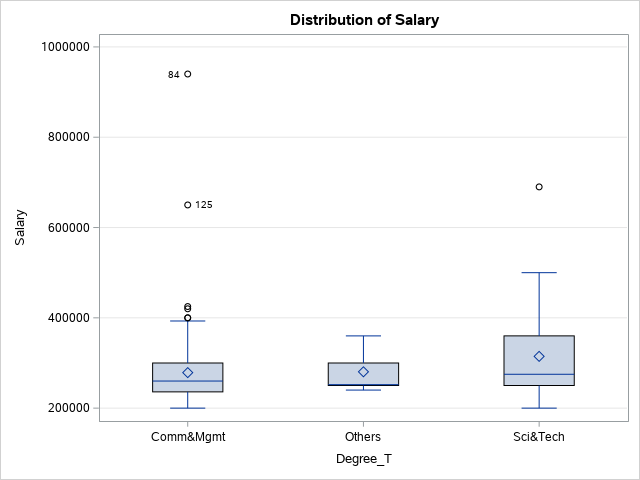
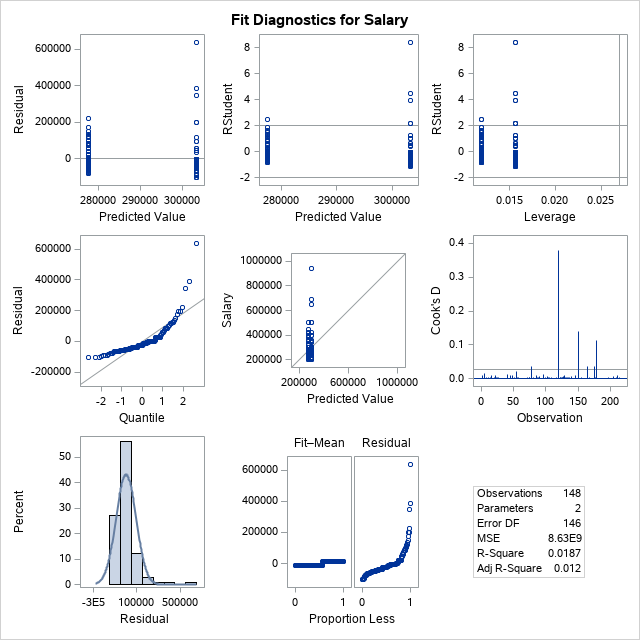
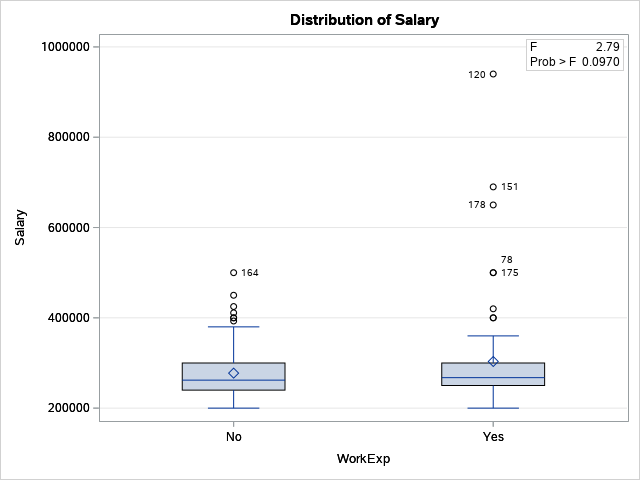
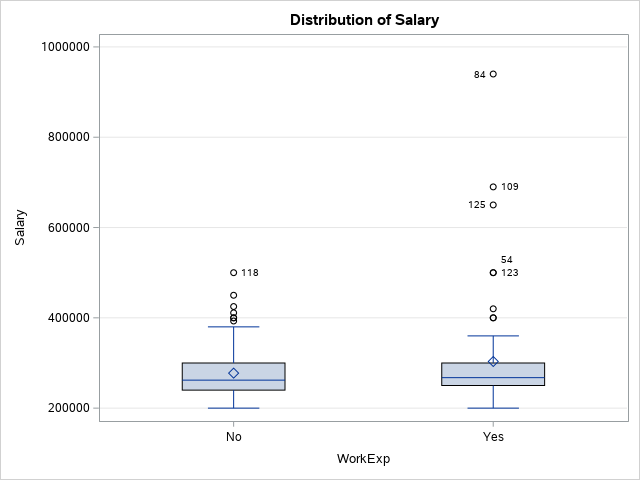
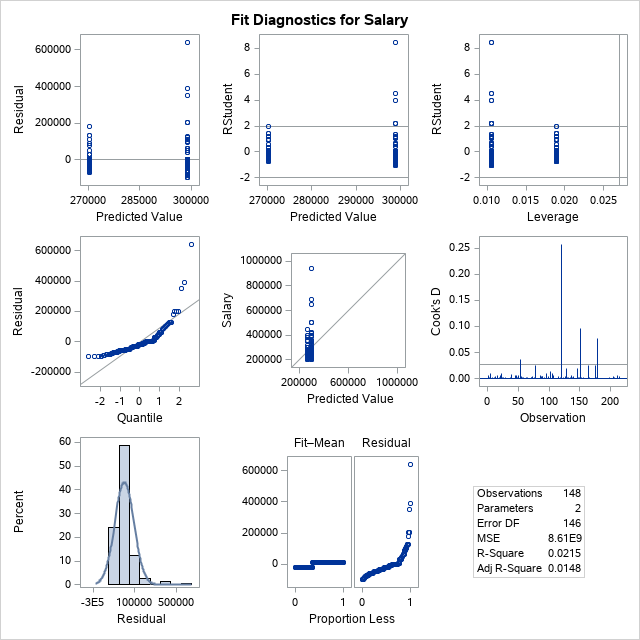
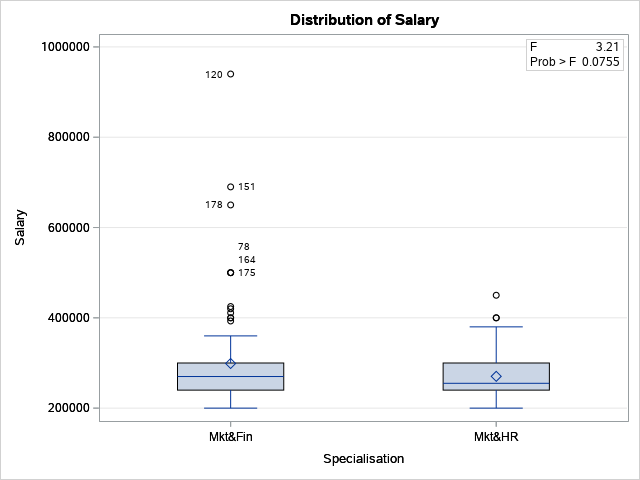
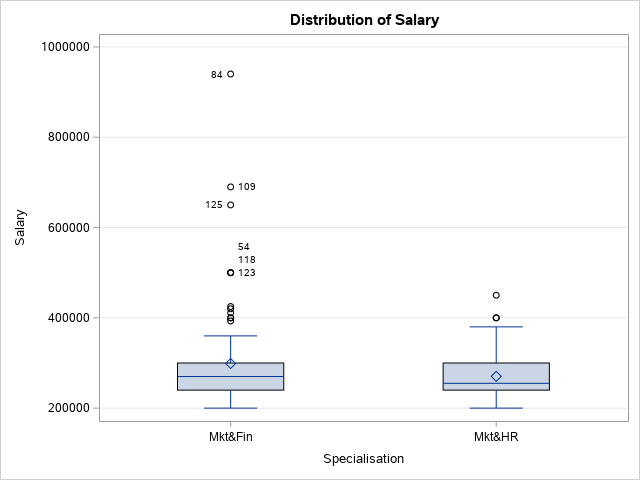

In [3]:
/* Performing a one-way ANOVA to identify the differences */
/* between the mean salary of students who get employed */
/* based on each categorical variable. */
/* Macro usage */

ods graphics;

%let category = gender hsc_s degree_t workexp specialisation;

%macro oneway(response=, predictor=);

%let i = 1;
%do %while(%scan(&predictor,&i,%str( )) ^= %str());

		%let factor = %scan(&predictor,&i,%str( ));
		
		proc glm data=df plots=diagnostics;
			where &response ne 0;
			class &factor;
			model &response = &factor;
			means &factor / hovtest=levene;
			title "One-Way ANOVA with &factor as Predictor";

		%let i = %eval(&i + 1);
%end;
	
run;
quit;
title;

%mend oneway;
%oneway(response=salary, predictor=&category);